## 1. 라이브러리 import

In [1]:
import numpy as np # 행렬/다차원배열 처리하는데 사용
import pandas as pd # 데이터 조작 및 분석에 사용
import matplotlib.pyplot as plt # 데이터를 plotting 하는데 사용

## pandas 

```bash
pandas에서 사용하는 데이터 형태 : 시리즈와 데이터프레임

1. 시리즈 : 1차원 배열 == 벡터
    - 구성 : 인덱스 & value
    - 구현 : pd.Series(데이터)
2. 데이터프레임 : 2차원 배열 == 행렬
    - 구성 : 인덱스 & column & value
    - 구현 : pd.DataFrame(데이터)
```

In [2]:
se = pd.Series(["인적사항","185cm","74kg","A형"])
se

0     인적사항
1    185cm
2     74kg
3       A형
dtype: object

In [3]:
se.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
se.values

array(['인적사항', '185cm', '74kg', 'A형'], dtype=object)

In [5]:
se.index = ["구분","키","체중","혈액형"]
se

구분      인적사항
키      185cm
체중      74kg
혈액형       A형
dtype: object

In [6]:
se = se.reset_index()
se

,index,0
0,구분,인적사항
1,키,185cm
2,체중,74kg
3,혈액형,A형


In [7]:
df = pd.DataFrame({
    "년도" : [2018,2019,2020,2021,2022],
    "체중" : [70,74,78,84,88],
    "취미" : ["댄스","독서","골프","독서","필라테스"]
})
df

,년도,체중,취미
0,2018,70,댄스
1,2019,74,독서
2,2020,78,골프
3,2021,84,독서
4,2022,88,필라테스


In [8]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [9]:
df.columns

Index(['년도', '체중', '취미'], dtype='object')

In [10]:
df.values

array([[2018, 70, '댄스'],
       [2019, 74, '독서'],
       [2020, 78, '골프'],
       [2021, 84, '독서'],
       [2022, 88, '필라테스']], dtype=object)

In [11]:
df = df.set_index("년도")
df

,체중,취미
년도,,
2018,70,댄스
2019,74,독서
2020,78,골프
2021,84,독서
2022,88,필라테스


In [12]:
df = df.reset_index()
df

,년도,체중,취미
0,2018,70,댄스
1,2019,74,독서
2,2020,78,골프
3,2021,84,독서
4,2022,88,필라테스


### 특정 행 가져오기

In [13]:
df[df["년도"] == 2018]

,년도,체중,취미
0,2018,70,댄스


### 특정 열(컬럼) 가져오기

In [14]:
df["취미"]

0      댄스
1      독서
2      골프
3      독서
4    필라테스
Name: 취미, dtype: object

### 특정 위치값 가져오기

In [15]:
df.iloc[0,0]

np.int64(2018)

### 조건에 따른 일치여부 판단하기

In [16]:
df["취미"]=="독서"

0    False
1     True
2    False
3     True
4    False
Name: 취미, dtype: bool

## 2. 데이터셋 로드 및 전처리

### 데이터세트 확인

In [17]:
import os

print(os.getcwd())

/Users/genieee/Desktop/LG DIC


In [18]:
prices_dataset = pd.read_csv("prices.csv", header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [19]:
yahoo = prices_dataset[prices_dataset["symbol"]=='YHOO']
yahoo

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
...,...,...,...,...,...,...,...
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0


In [20]:
ysp = yahoo['close'].values.astype('float32')
ysp = ysp.reshape(1762,1)
ysp.shape

(1762, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(ysp)

ysp = scaler.transform(ysp)

In [22]:
train_size = int(len(ysp)*0.80)
test_size = len(ysp) - train_size
train, test = ysp[0:train_size,:], ysp[train_size:len(ysp),:]

train_ratio = round(len(train)/len(ysp),3)
test_ratio = round(len(test)/len(ysp),3)
print(f"Train set 비율 : {train_ratio}, Test set 비율 : {test_ratio}")

Train set 비율 : 0.8, Test set 비율 : 0.2


In [23]:
def create_dataset(dataset, look_back=1):
	
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
  
	return np.array(dataX), np.array(dataY)

In [24]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1407, 1)
(1407,)
(351, 1)
(351,)


In [25]:
samples = trainX.shape[0]
test_samples = testX.shape[0]
time_step = 1
features = 1

trainX = np.reshape(trainX,(samples,time_step,features))
testX = np.reshape(testX, (test_samples,time_step,features))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1407, 1, 1)
(1407,)
(351, 1, 1)
(351,)


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.dropout1(out)
        out, _ = self.lstm2(out)
        out = self.dropout2(out)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = features
hidden_size1 = 50
hidden_size2 = 100
output_size = 1
dropout_prob = 0.2
learning_rate = 0.001
num_epochs = 10
batch_size = 128

# Model Initialization
model = LSTMModel(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

print(model)

LSTMModel(
  (lstm1): LSTM(1, 50, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(50, 100, batch_first=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)


In [27]:
# Training Loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(trainX), batch_size):
        batch_X = torch.tensor(trainX[i:i + batch_size], dtype=torch.float32)
        batch_Y = torch.tensor(trainY[i:i + batch_size], dtype=torch.float32).view(-1, 1)  # Reshape target tensor
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0056
Epoch [2/10], Loss: 0.0782
Epoch [3/10], Loss: 0.0798
Epoch [4/10], Loss: 0.0808
Epoch [5/10], Loss: 0.0692
Epoch [6/10], Loss: 0.0642
Epoch [7/10], Loss: 0.0631
Epoch [8/10], Loss: 0.0522
Epoch [9/10], Loss: 0.0461
Epoch [10/10], Loss: 0.0365


In [28]:
# Evaluation
model.eval()
pred = model(torch.tensor(testX, dtype=torch.float32)).detach().numpy()

pred = scaler.inverse_transform(pred)

print(f"Prediction Shape: {pred.shape}")

# Reshape testY and inverse transform
testY = scaler.inverse_transform(testY.reshape(-1, 1))
print(f"TestY Shape: {testY.shape}")

Prediction Shape: (351, 1)
TestY Shape: (351, 1)


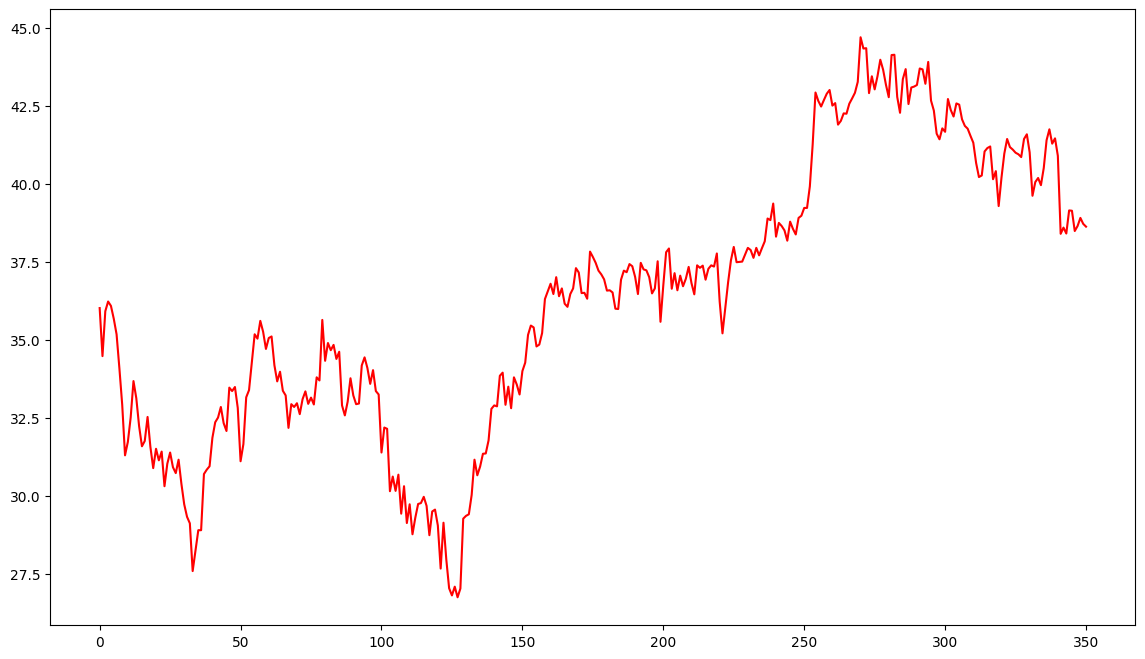

In [29]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(testY,'r')
plt.show()

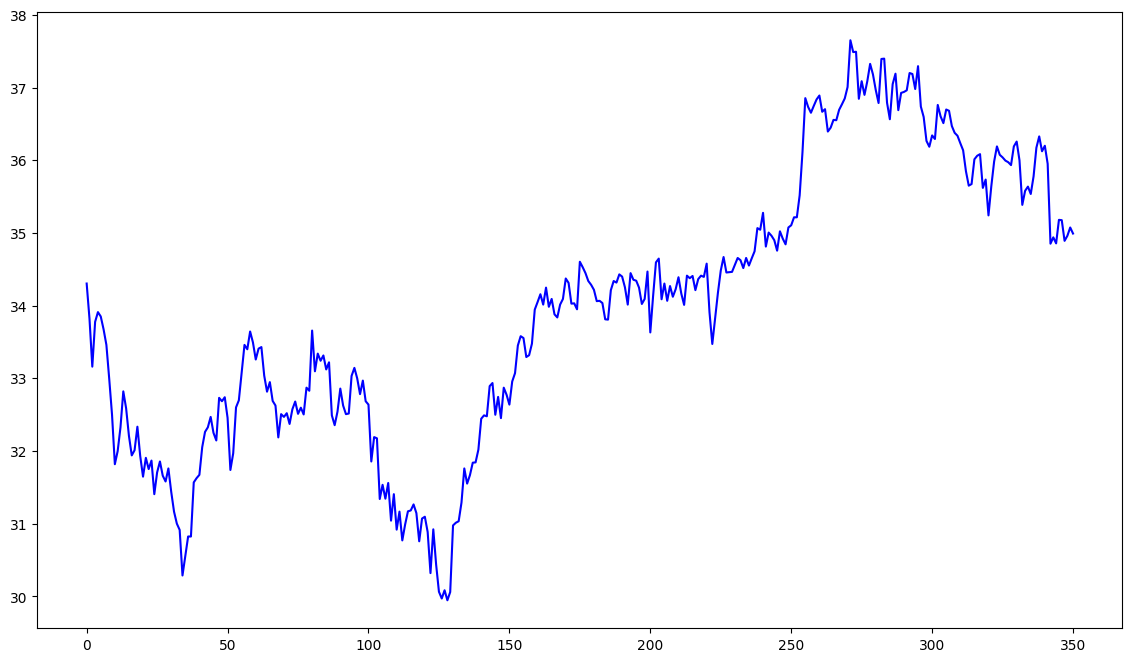

In [30]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(pred,'b')
plt.show()

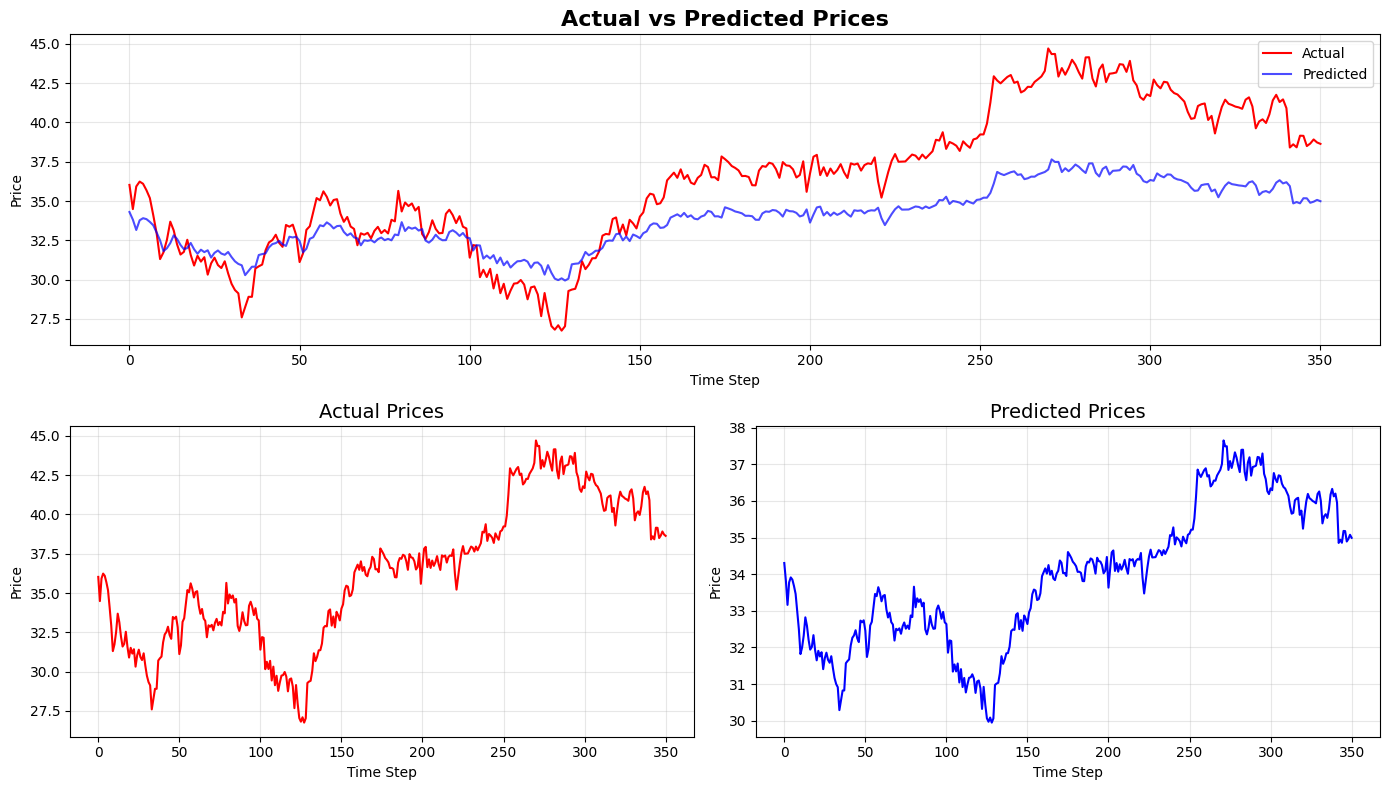

In [31]:
# Visualization
plt.figure(figsize=(14, 8))

# Plot Actual vs Predicted
plt.subplot(2, 1, 1)
plt.title("Actual vs Predicted Prices", fontsize=16, fontweight='bold')
plt.plot(testY, label="Actual", color='red', linewidth=1.5)
plt.plot(pred, label="Predicted", color='blue', linewidth=1.5, alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)

# Plot Actual Prices
plt.subplot(2, 2, 3)
plt.title("Actual Prices", fontsize=14)
plt.plot(testY, color='red', linewidth=1.5)
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(alpha=0.3)

# Plot Predicted Prices
plt.subplot(2, 2, 4)
plt.title("Predicted Prices", fontsize=14)
plt.plot(pred, color='blue', linewidth=1.5)
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
def predict_sequences_multiple(model, firstValue, length):
    model.eval()
    prediction_seqs = []
    curr_frame = firstValue.copy()

    with torch.no_grad():
        for _ in range(length):
            curr_frame_tensor = torch.tensor(curr_frame[np.newaxis, :, :], dtype=torch.float32)
            
            predicted_price = model(curr_frame_tensor).numpy()
            
            prediction_seqs.append(predicted_price[0][0])
            
            curr_frame = np.roll(curr_frame, -1, axis=0)
            curr_frame[-1, 0] = predicted_price[0][0]
            
    return prediction_seqs

predict_length = 5
# 선택된 테스트 데이터의 첫 번째 시퀀스를 사용하여 5일 예측
pred = predict_sequences_multiple(model, testX[3], predict_length)
pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))

print("Predicted 5-Day Prices:", pred.flatten())

Predicted 5-Day Prices: [33.778347 32.859024 32.469982 32.306038 32.237064]


In [33]:
testY[3:8]

array([[36.24],
       [36.1 ],
       [35.69],
       [35.19],
       [34.1 ]], dtype=float32)

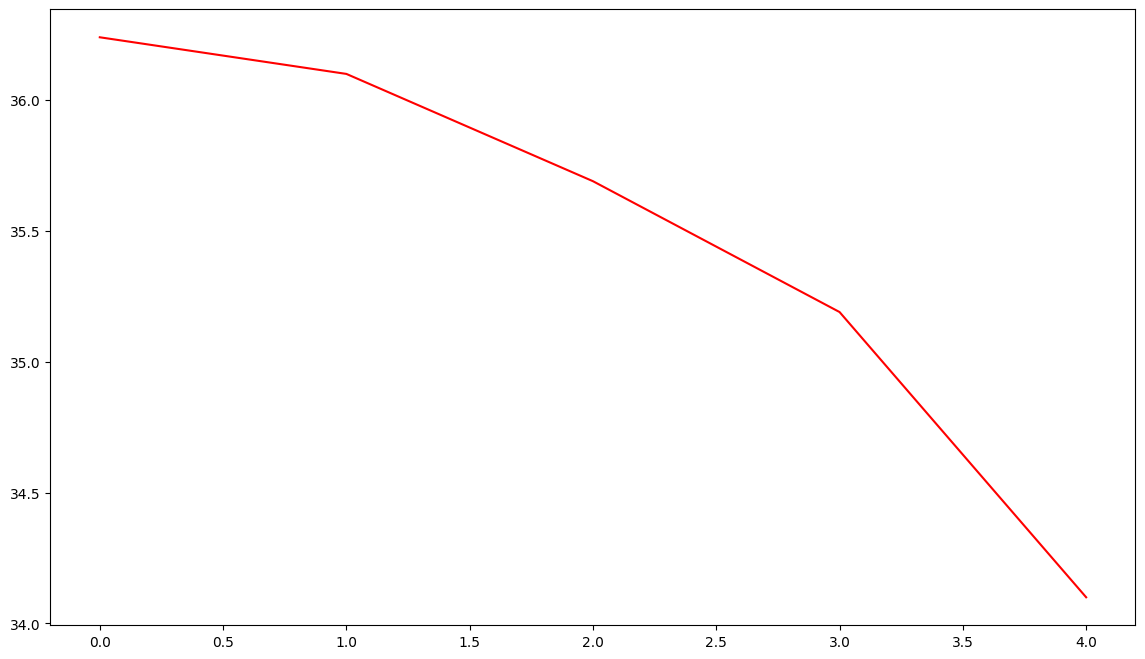

In [34]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(testY[3:8],'r')
plt.show()

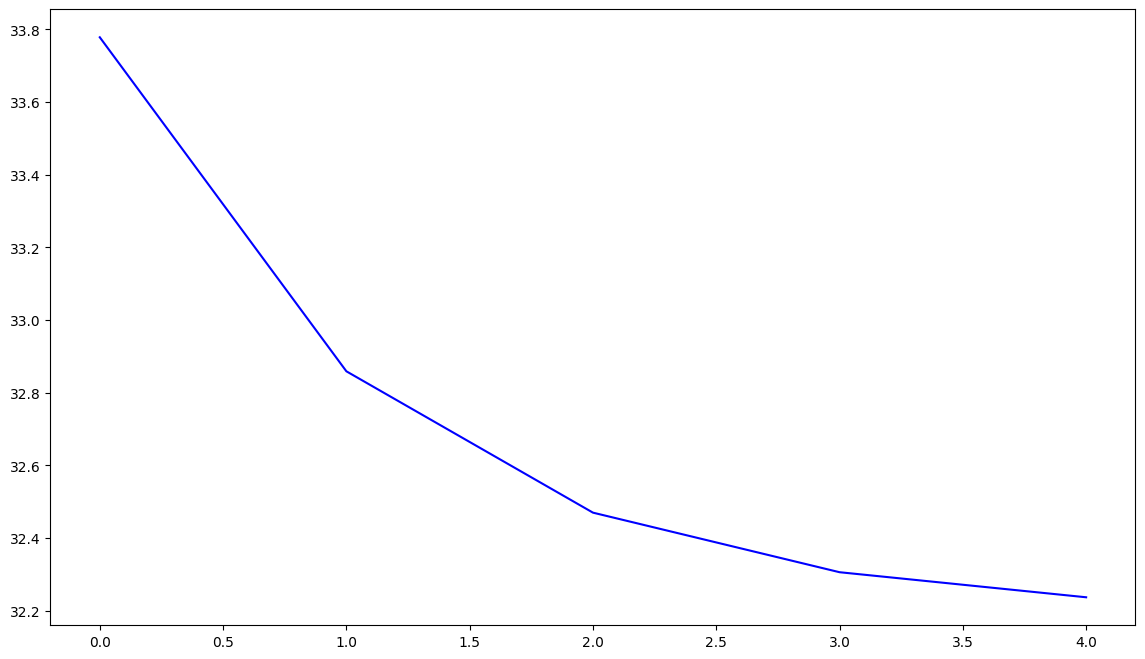

In [35]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(pred,'b')
plt.show()

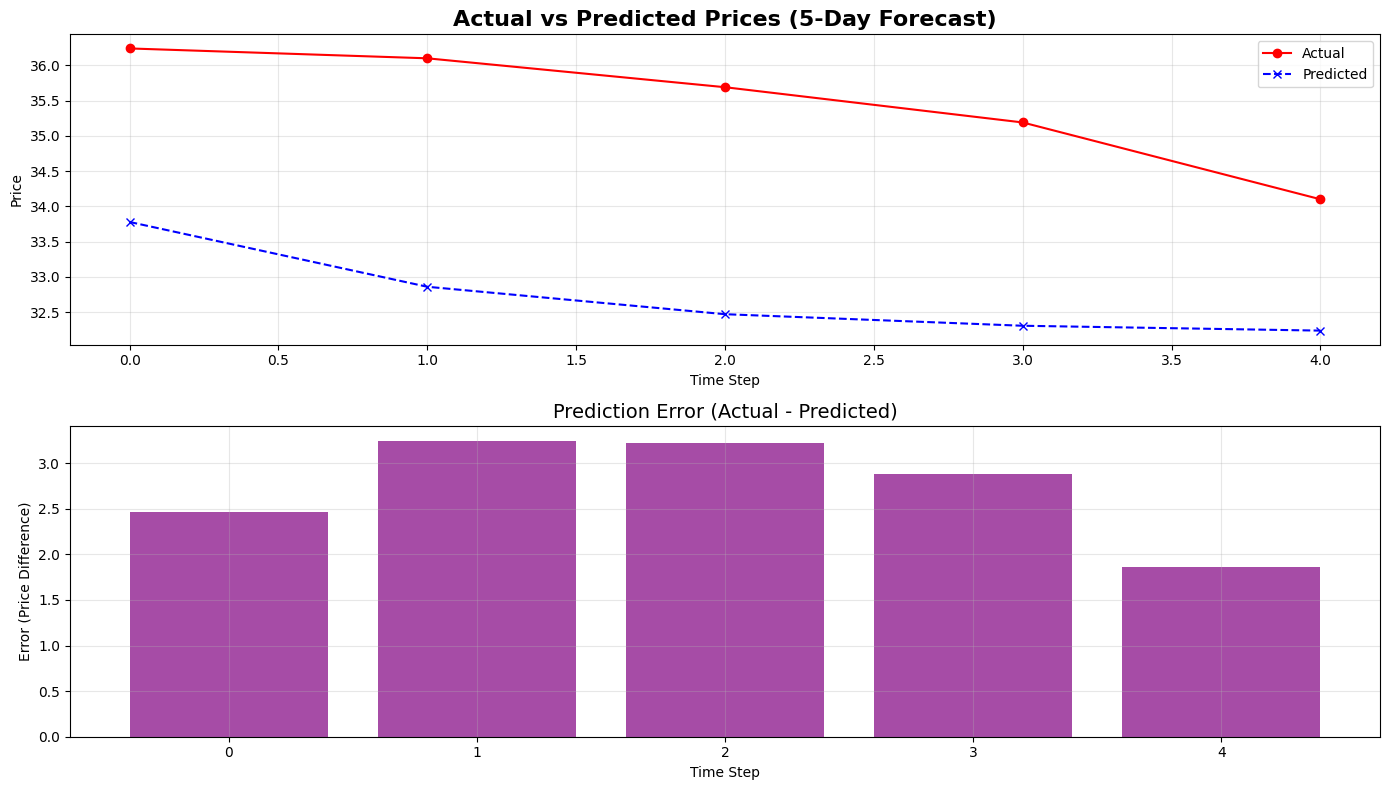

In [36]:
# Visualization
plt.figure(figsize=(14, 8))

# 5일간 예측할 데이터 인덱스 (3번부터 시작)
start_index = 3
predict_length = 5

# 실제 데이터에서 5일간의 실제 값을 추출
actual_prices = testY[start_index:start_index + predict_length].flatten()

# 예측된 5일간의 데이터 (이미 pred 변수로 정의됨)
predicted_prices = pred.flatten()

# Plot Actual vs Predicted Prices
plt.subplot(2, 1, 1)
plt.title("Actual vs Predicted Prices (5-Day Forecast)", fontsize=16, fontweight='bold')
plt.plot(actual_prices, label="Actual", color='red', linewidth=1.5, marker='o')
plt.plot(predicted_prices, label="Predicted", color='blue', linewidth=1.5, marker='x', linestyle='--')
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)

# Calculate the difference between actual and predicted
price_diff = actual_prices - predicted_prices

# Plot the difference as a bar chart
plt.subplot(2, 1, 2)
plt.title("Prediction Error (Actual - Predicted)", fontsize=14)
plt.bar(range(predict_length), price_diff, color='purple', alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Error (Price Difference)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
